## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [195]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [196]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# from google.colab import drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
##  Load the csv file
Loan = pd.read_csv('/content/drive/My Drive/Python/ML/project/Loan_Modelling.csv')

In [5]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

## Data Overview

* Observations
* Sanity checks

**View the first and last 5 rows of the dataset.**

In [6]:
data.head()  ##view top 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
data.tail()  ##view last 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**Understand the shape of the dataset.**

In [8]:
data.shape  ##get the shape of the data

(5000, 14)

**Check the data types of the columns for the dataset**

In [9]:
data.dtypes  ##view the datatypes of the data

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIPCode,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal_Loan,int64


**Checking the Statistical Summary**

In [ ]:
data.describe().T  ##print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Dropping columns**

In [10]:
data = data.drop(['ID'], axis=1)  ##drop a column from the dataframe

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Exploratory Data Analysis**

**Visual Summary of Continuous Data**

In [98]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [99]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

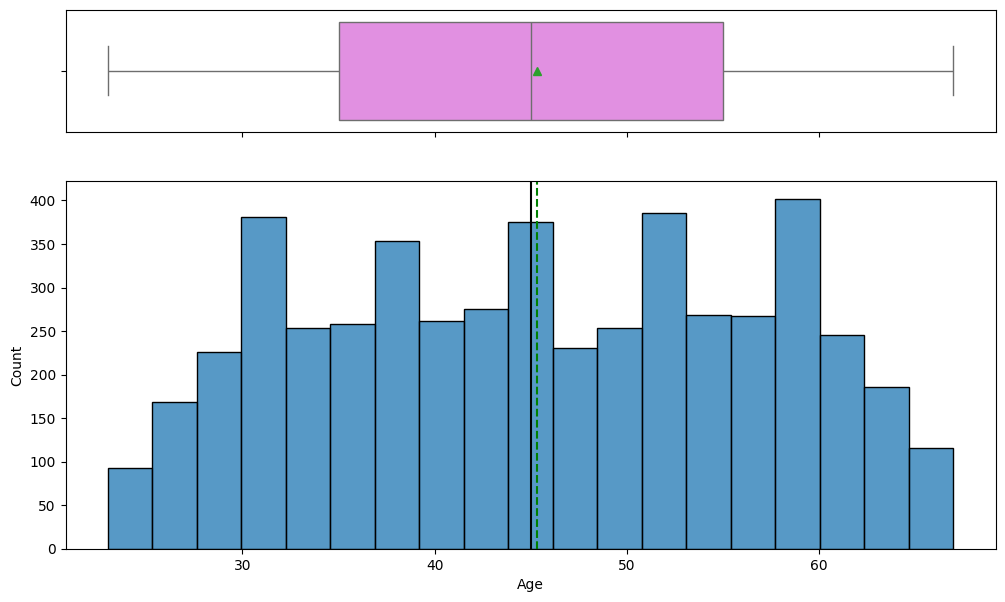

In [130]:
# Visualize distribution and outliers for the "Age" column
histogram_boxplot(data, "Age")

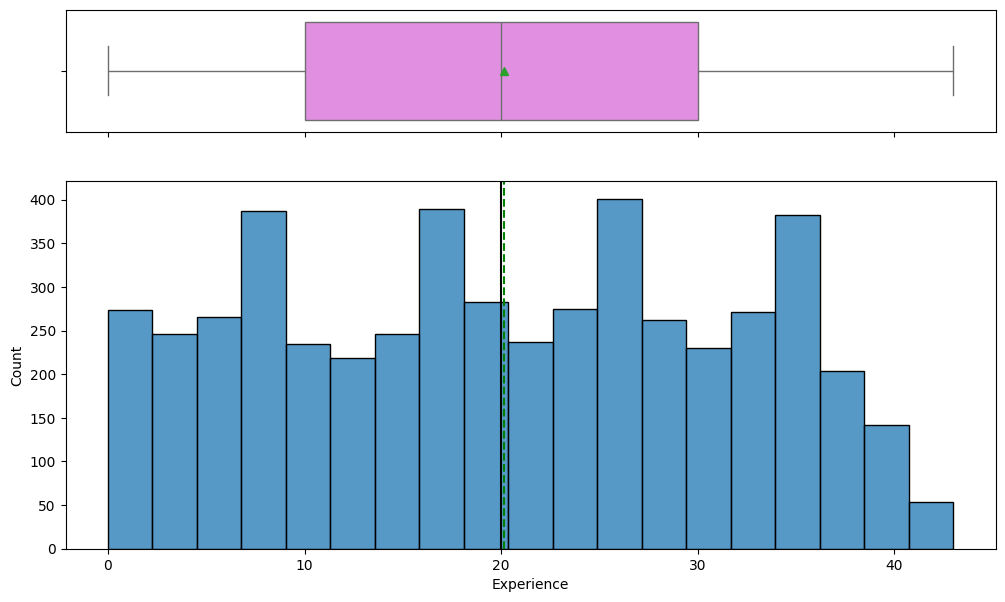

In [131]:
# Visualize distribution and outliers for the "Experience" column
histogram_boxplot(data, "Experience")

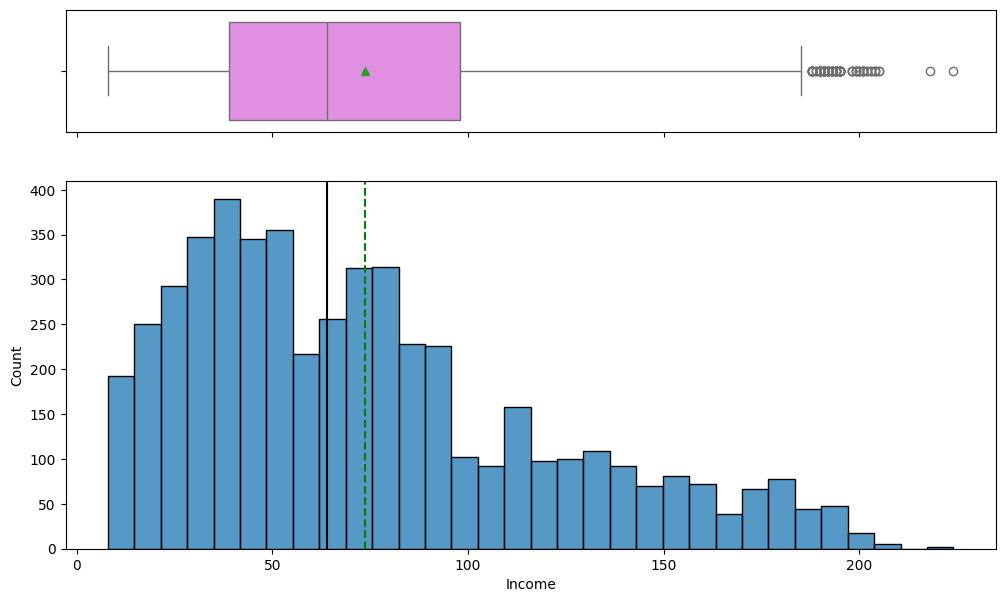

In [132]:
# Visualize distribution and outliers for the "Income" column
histogram_boxplot(data,"Income")

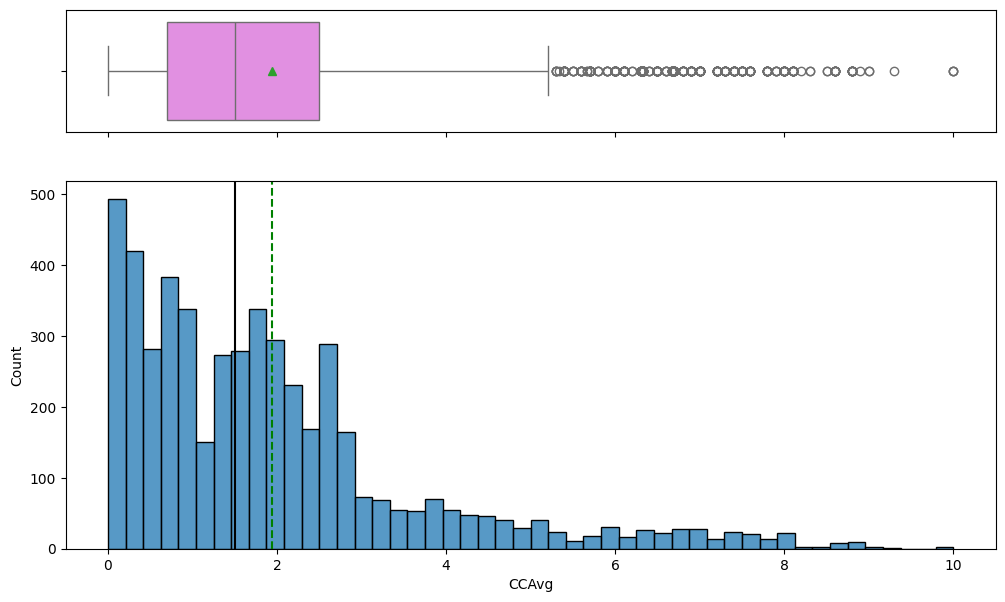

In [133]:
# Visualize distribution and outliers for the "CCAvg" column
histogram_boxplot(data,"CCAvg")

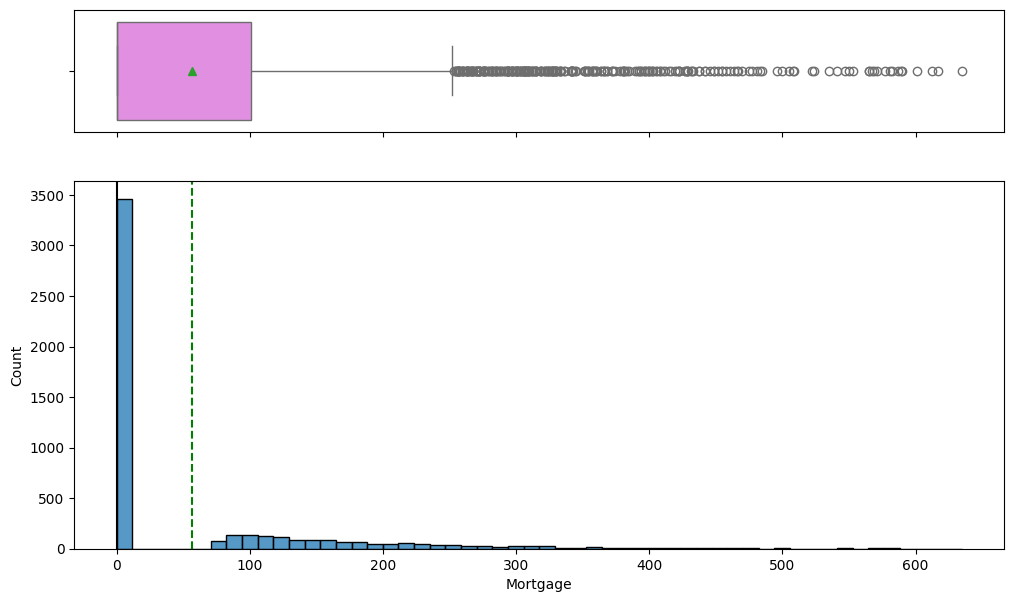

In [134]:
# Visualize distribution and outliers for the "Mortgage" column
histogram_boxplot(data,"Mortgage")

**Distribution of Categorical Features**

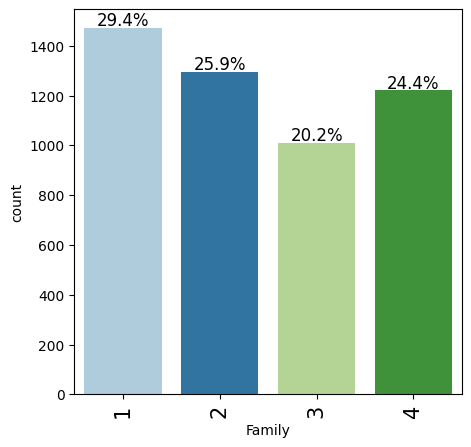

In [135]:
# Plot labeled bar chart of "Family" as percentages
labeled_barplot(data, "Family", perc=True)

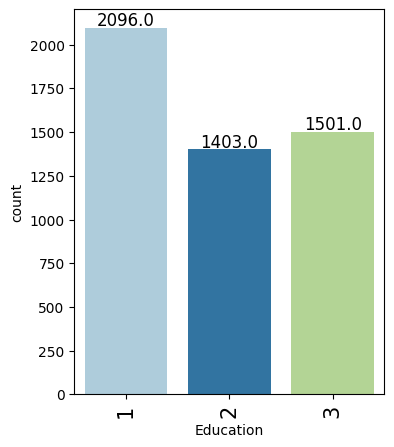

In [136]:
# Plot labeled bar chart of "Education" (1=Undergrad, 2=Graduate, 3=Advanced/Professional)
labeled_barplot(data, "Education")

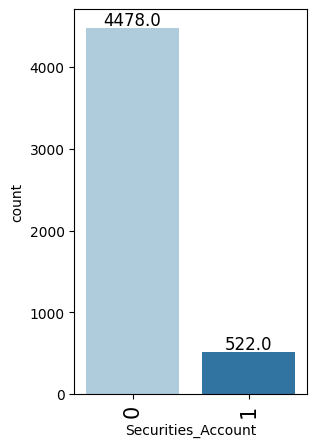

In [137]:
# Plot labeled bar chart of "Securities_Account" (0 = No account, 1 = Has account)
labeled_barplot(data, "Securities_Account")

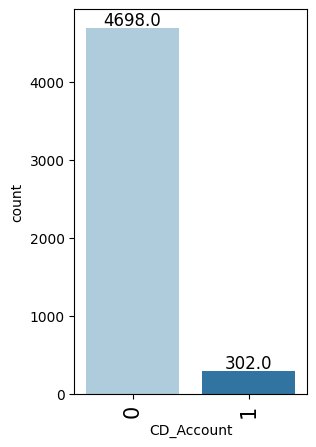

In [138]:
# Plot labeled bar chart of "CD_Account" (0 = No CD account, 1 = Has CD account)
labeled_barplot(data, "CD_Account")

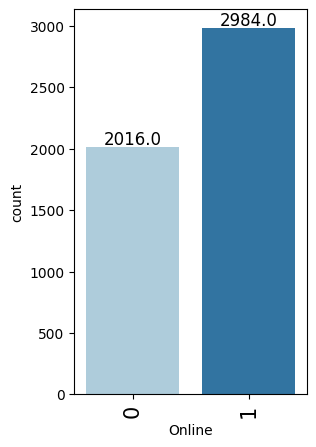

In [139]:
# Plot labeled bar chart of "Online" (0 = Not using online banking, 1 = Using online banking)
labeled_barplot(data, "Online")

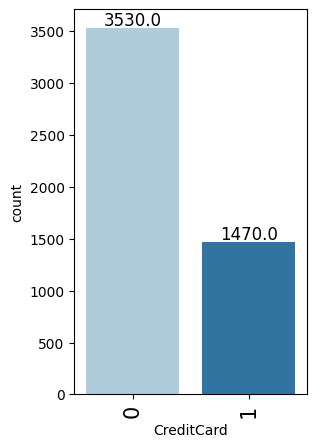

In [140]:
# Plot labeled bar chart of "CreditCard" (0 = Does not use credit card, 1 = Uses credit card)
labeled_barplot(data, "CreditCard")

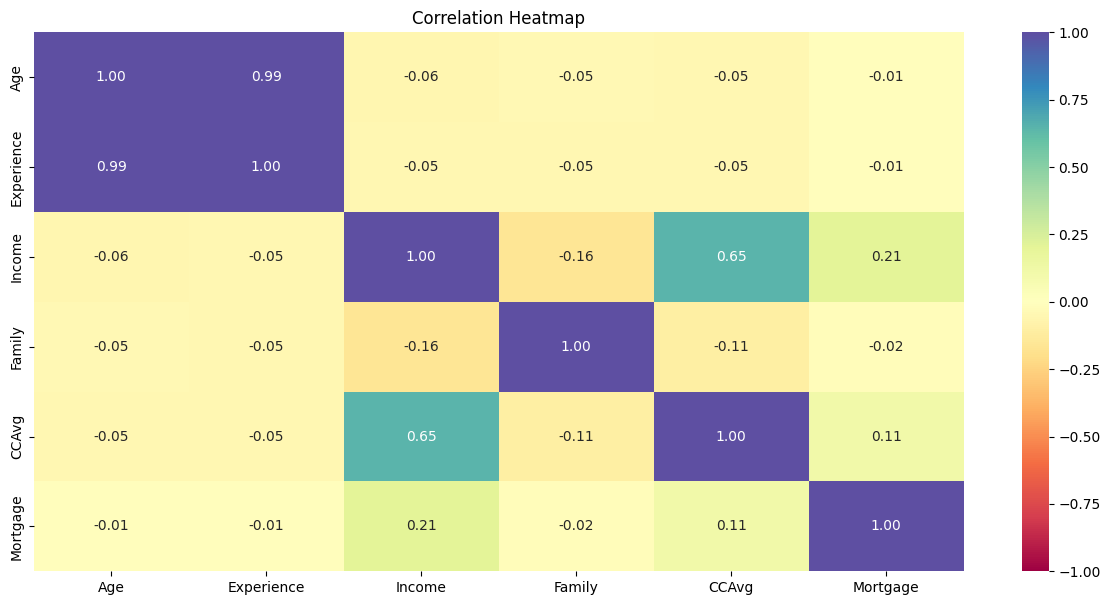

In [141]:
# Plot correlation heatmap for all numerical features
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Correlation Heatmap")
plt.show()

In [142]:
# Function to print category counts and plot a stacked bar chart comparing a predictor with the target
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: DataFrame containing the data
    predictor: Categorical independent variable
    target: Categorical target variable
    """
    # Count the number of unique categories in the predictor
    count = data[predictor].nunique()

    # Identify the least frequent class in the target (used for sorting)
    sorter = data[target].value_counts().index[-1]

    # Create and print a crosstab of raw counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Create a normalized (row-wise) crosstab and plot as a stacked bar chart
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))

    # Customize legend placement
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Show plot
    plt.show()

In [113]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


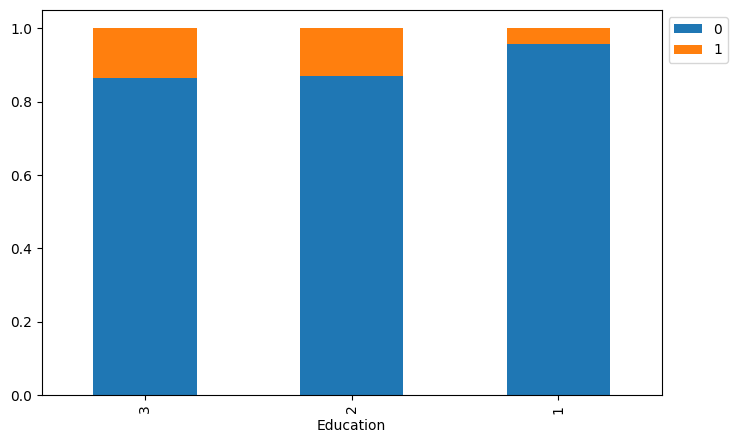

In [143]:
# Stacked bar chart: Education vs. Personal Loan
stacked_barplot(data, "Education", "Personal_Loan")

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


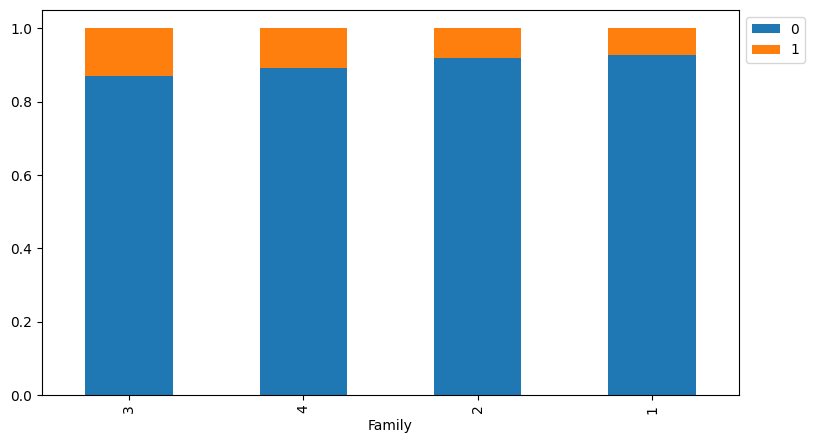

In [144]:
# Plot stacked barplot for Personal_Loan and Family
stacked_barplot(data, predictor="Family", target="Personal_Loan")

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


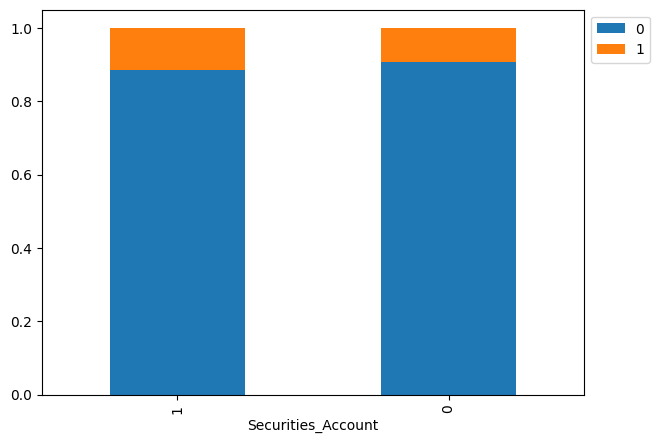

In [145]:
# Plot stacked barplot for Personal_Loan and Securities_Account
stacked_barplot(data, predictor="Securities_Account", target="Personal_Loan")

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


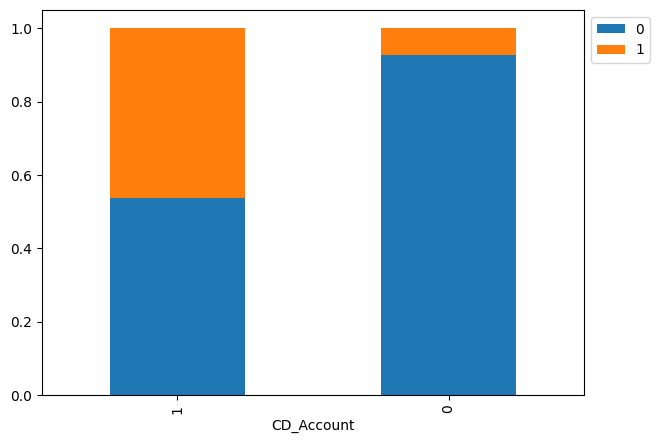

In [146]:
# Plot stacked barplot for Personal_Loan and CD_Account
stacked_barplot(data, predictor="CD_Account", target="Personal_Loan")

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


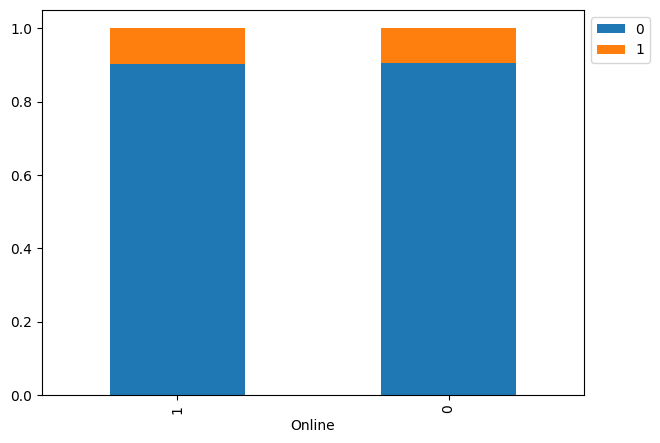

In [147]:
# Plot stacked barplot for Personal_Loan and Online
stacked_barplot(data, predictor="Online", target="Personal_Loan")

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


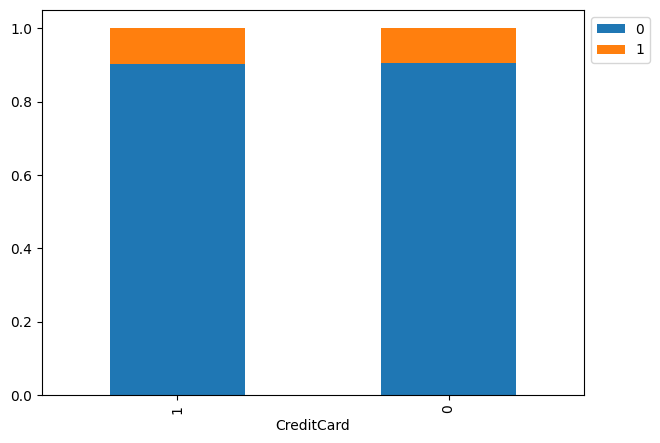

In [148]:
# Plot stacked barplot for Personal_Loan and CreditCard
stacked_barplot(data, predictor="CreditCard", target="Personal_Loan")

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


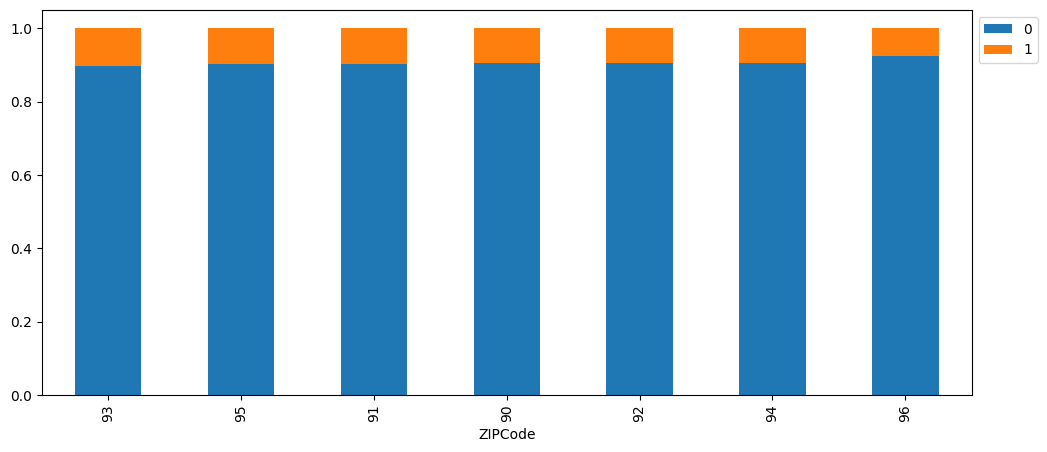

In [149]:
# Plot stacked barplot for Personal_Loan and ZIPCode
stacked_barplot(data, predictor="ZIPCode", target="Personal_Loan")

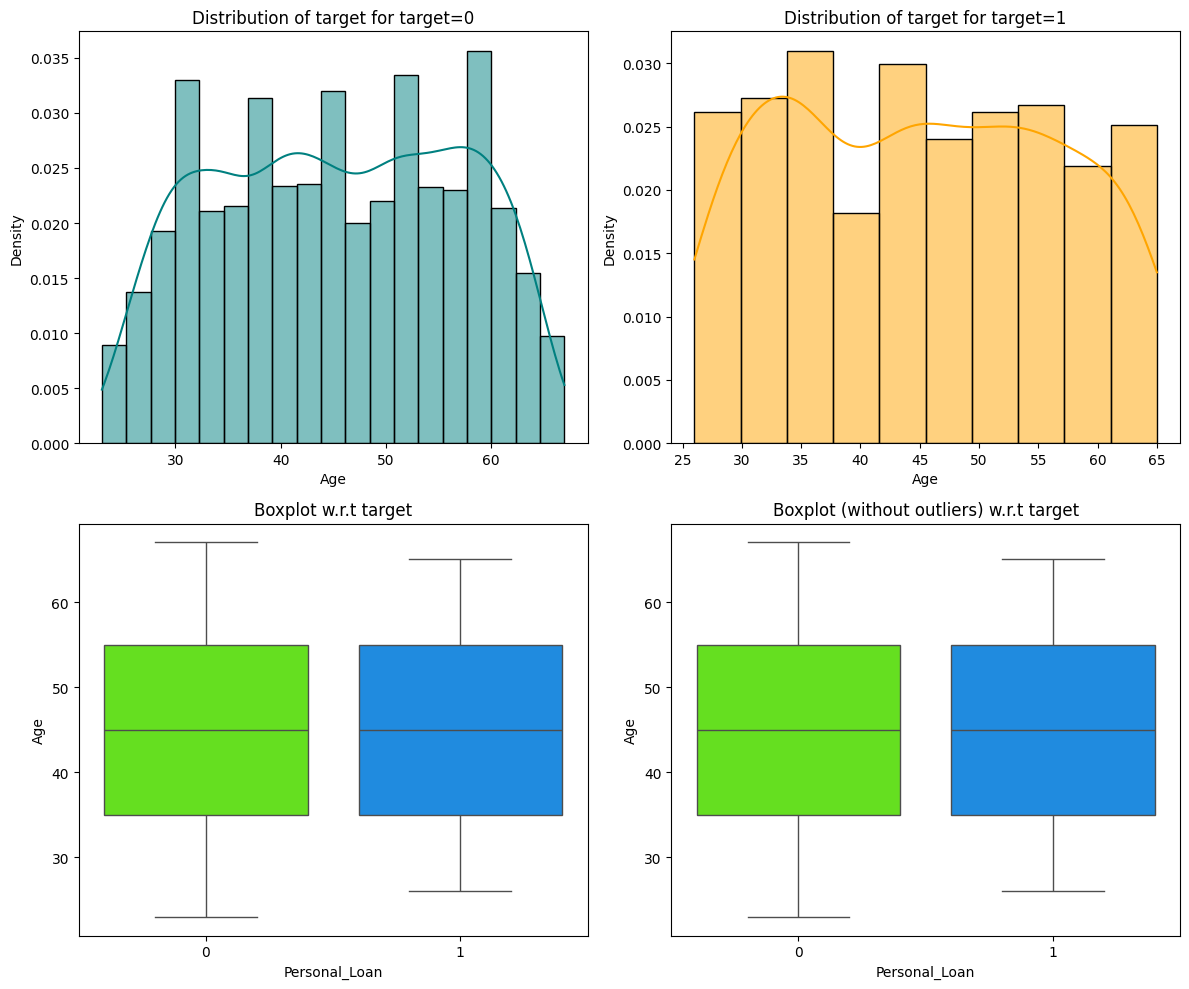

In [150]:
# Plot distribution of "Age" grouped by "Personal_Loan" to compare age trends across loan status
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

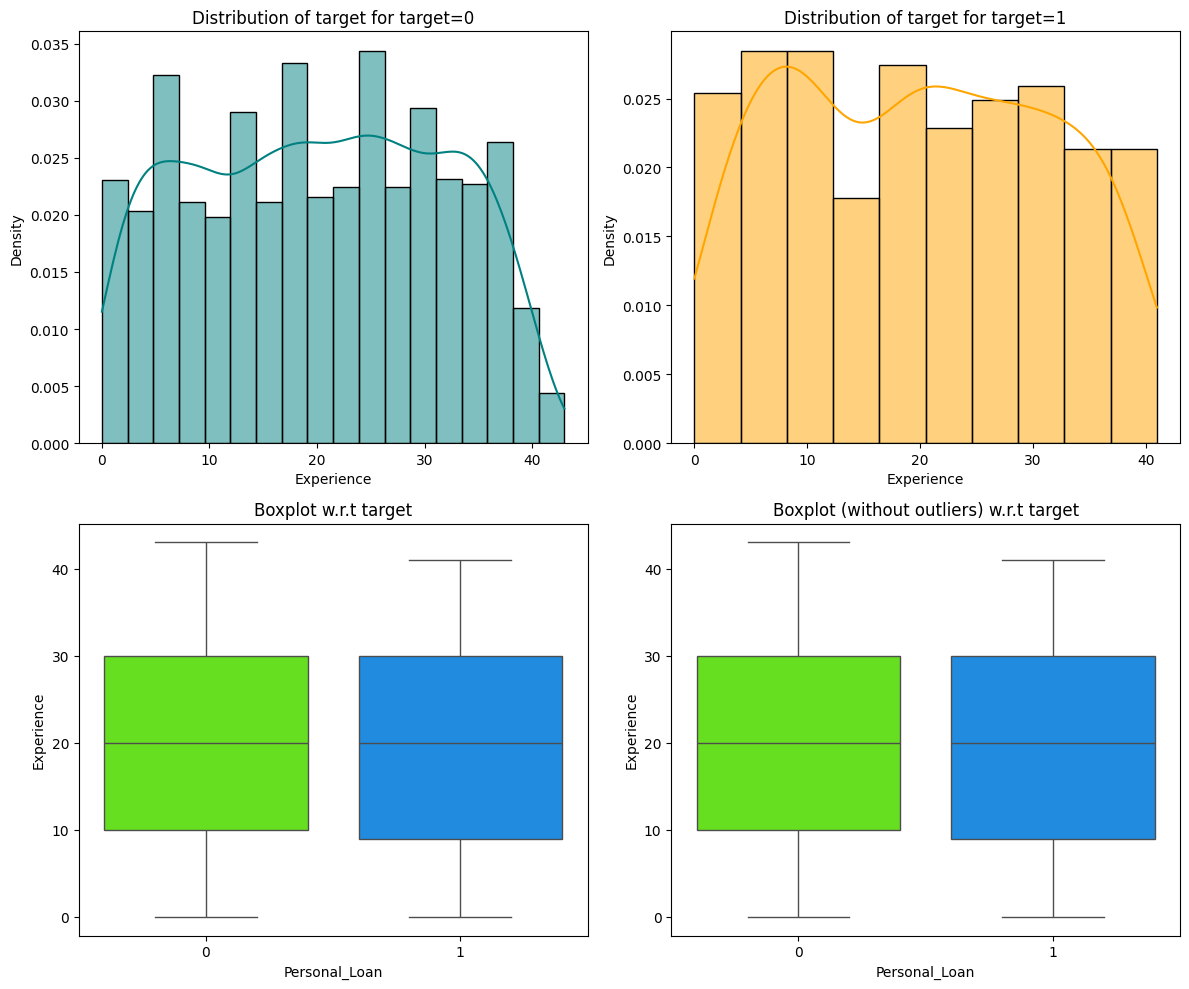

In [151]:
# Plot distribution of "Experience" by personal loan status
distribution_plot_wrt_target(data, predictor="Experience", target="Personal_Loan")

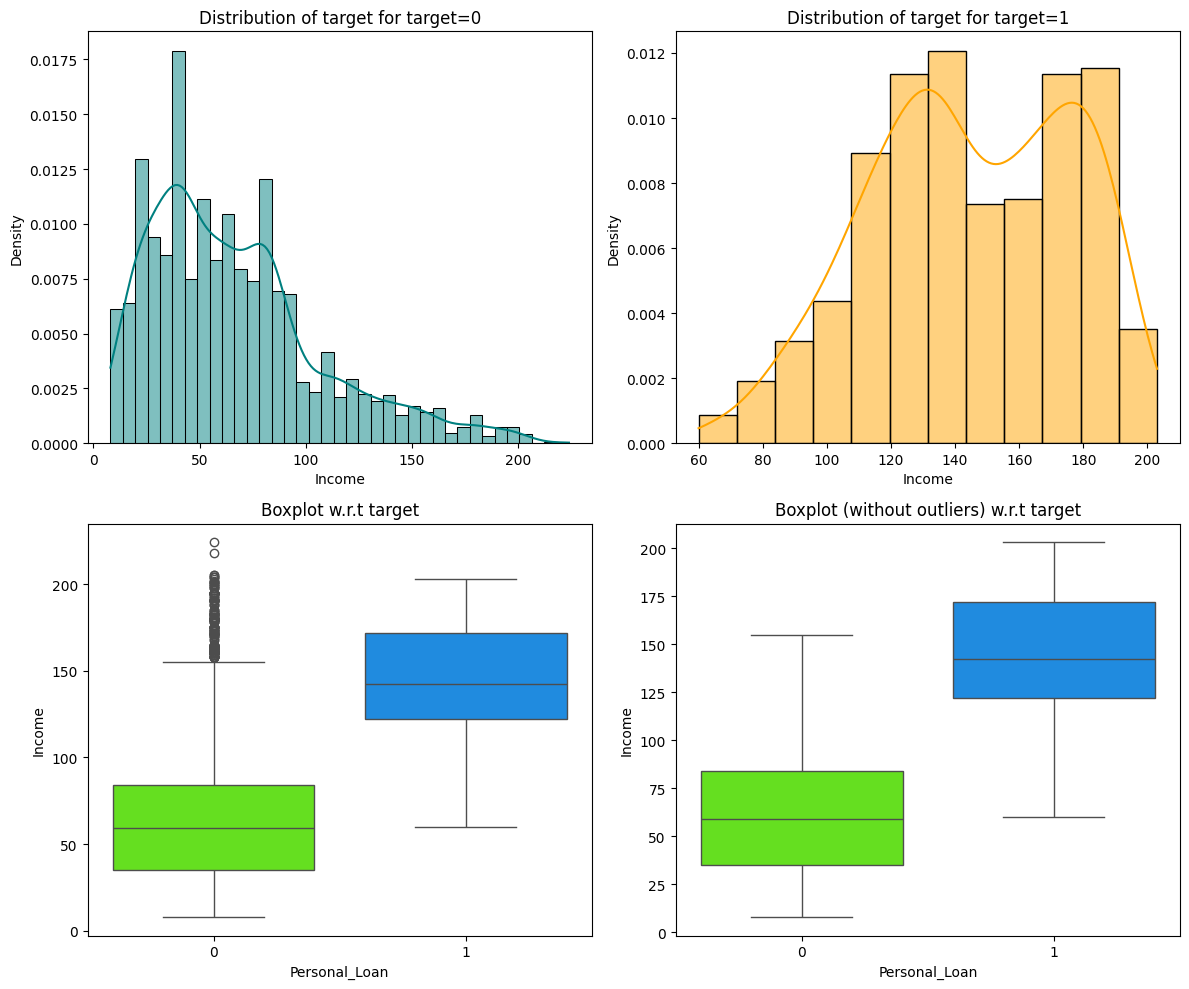

In [152]:
# Plot distribution of Income with respect to Personal_Loan
distribution_plot_wrt_target(data, predictor="Income", target="Personal_Loan")

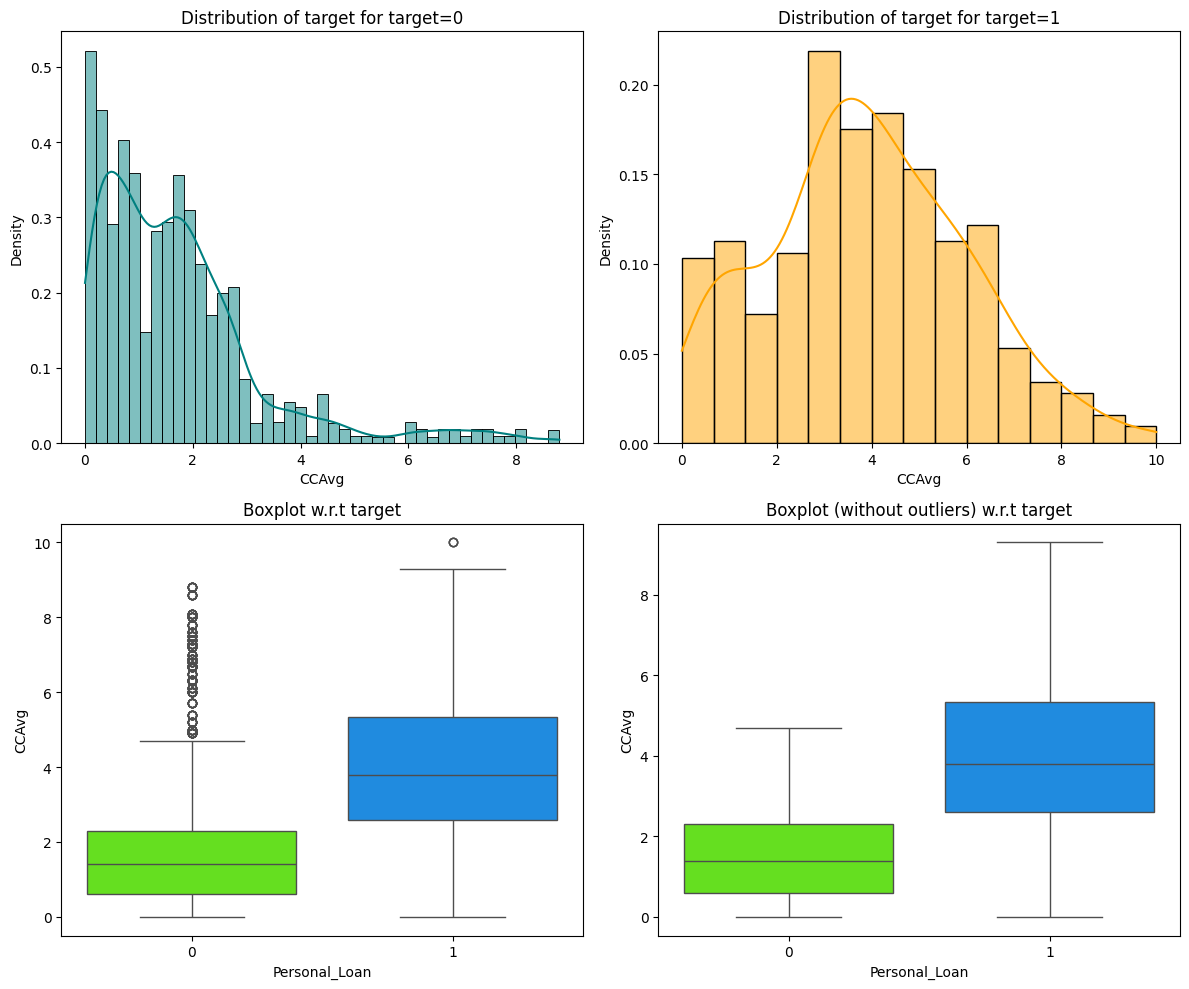

In [153]:
# Plot distribution of CCAvg with respect to Personal_Loan
distribution_plot_wrt_target(data, predictor="CCAvg", target="Personal_Loan")

**Answer for Q1-Q5**

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

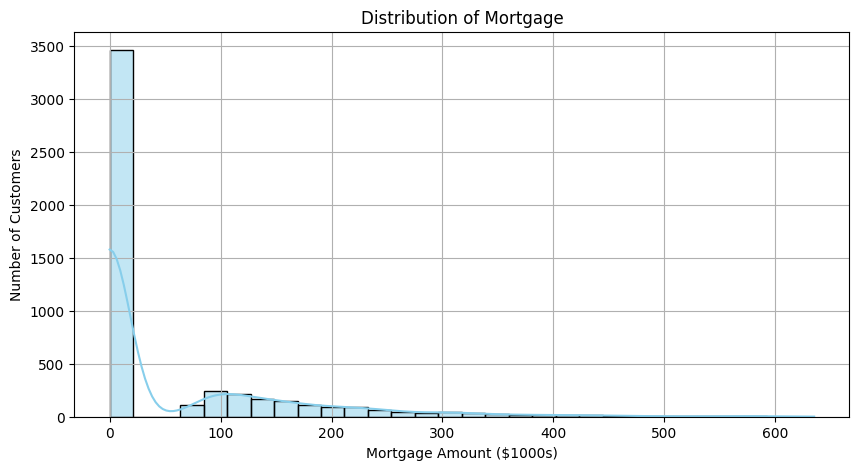

In [125]:
#Q1: Plot a histogram with KDE for the 'Mortgage' attribute
plt.figure(figsize=(10, 5))
sns.histplot(data['Mortgage'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Amount ($1000s)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

**Answers Q1:**

1.What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
*   The Mortgage attribute is right-skewed, meaning most customers have little to no mortgage.
*   There are some outliers with significantly high mortgage values, indicating a few customers have large home loans.

In [160]:
#Q2 Count total number of customers who have a credit card (CreditCard == 1)
data['CreditCard'].astype(int).sum()

np.int64(1470)

**Answers Q2:**

2.How many customers have credit cards?
*   A total of 1,470 customers have a credit card issued by a bank other than AllLife Bank.

In [156]:
#Q3 Compute the correlation matrix for all numerical features
correlation_matrix = data.corr()

# Extract correlations with the target column 'Personal_Loan', and sort them in descending order
correlation_with_loan = correlation_matrix['Personal_Loan'].sort_values(ascending=False)

# Display the correlation values
print("Correlation of each attribute with 'Personal_Loan':")
print(correlation_with_loan)

Correlation of each attribute with 'Personal_Loan':
Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.000607
Age                  -0.007726
Experience           -0.008304
Name: Personal_Loan, dtype: float64


**Answers Q3:**
The attributes that have a strong correlation with the target attribute Personal_Loan are:


*   Income (correlation ≈ 0.50): Higher income customers are more likely to accept personal loans.
*   CCAvg (Credit Card Average Spending, correlation ≈ 0.37): Customers who spend more on credit cards are more likely to take loans.
*   CD_Account (correlation ≈ 0.32): Customers with certificate of deposit accounts show a higher likelihood of accepting personal loans.

These three attributes have the strongest positive correlations with personal loan acceptance.

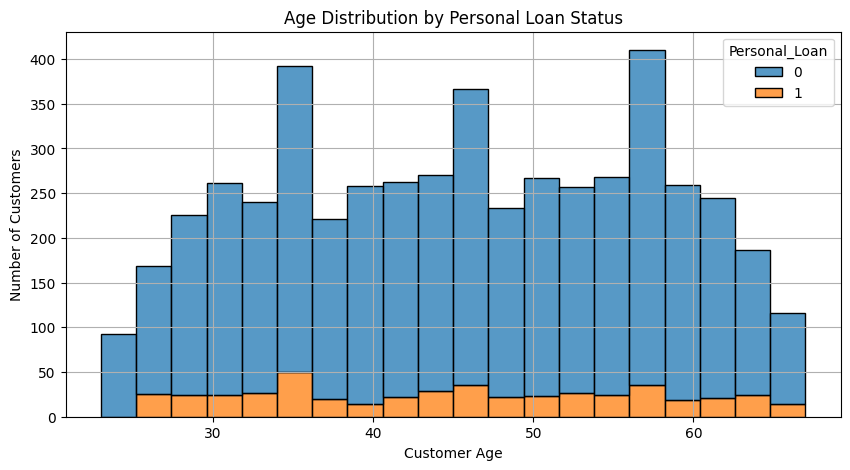

In [157]:
#Q4 Plot the age distribution, separated by personal loan status
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Age', hue='Personal_Loan', multiple='stack', bins=20)
plt.title("Age Distribution by Personal Loan Status")
plt.xlabel("Customer Age")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

**Answers Q4:**

*   The distribution of personal loan acceptance appears relatively even across age groups, with no strong concentration in any particular age range.
While there may be slightly more loan takers between ages 35 and 55, the difference is not pronounced enough to draw a definitive conclusion.


Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


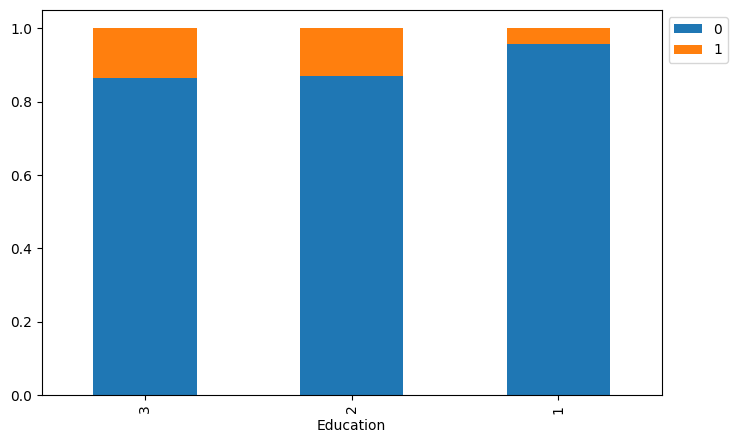

In [159]:
# Stacked bar chart: Education vs. Personal Loan
stacked_barplot(data, "Education", "Personal_Loan")

**Answers Q5:**

* Customers with higher education levels (**Graduate and Professional**) are **more likely** to accept personal loans.
* Undergraduates show the **lowest loan acceptance rate**.
* Loan marketing campaigns may be more effective if targeted at **customers with advanced education**.



## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Checking for Anomalous Values**

In [177]:
# Display unique values in the "Experience" column
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [178]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([], dtype=int64)

In [179]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [181]:
# Display unique values in the "Education" column
data["Education"].unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

**Feature Engineering**

In [182]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

7

In [183]:
# Convert ZIPCode to string for slicing
data["ZIPCode"] = data["ZIPCode"].astype(str)

# Print number of unique 2-digit ZIP code prefixes
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)

# Keep only the first two digits of ZIPCode
data["ZIPCode"] = data["ZIPCode"].str[0:2]

# Convert ZIPCode back to categorical type
data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [184]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

**Missing value treatment**

In [185]:
# Check the total number of missing values in each column
print(data.isnull().sum())

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


(Comment)No missing value was detected.

**Outlier Detection**

In [186]:
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # 25th percentile
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)  # 75th percentile

IQR = Q3 - Q1  # Interquartile Range

lower = Q1 - 1.5 * IQR  # Lower bound for outlier detection
upper = Q3 + 1.5 * IQR  # Upper bound for outlier detection

In [188]:
# Calculate the percentage of outliers outside the lower and upper bounds for all numeric columns
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100


,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


**Data Preparation for Modeling**

In [189]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [194]:
# Show dimensions of the training data
print("Shape of Training set : ", X_train.shape)

# Show dimensions of the test data
print("Shape of test set : ", X_test.shape)

# Show class distribution (in %) in the training set
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

# Show class distribution (in %) in the test set
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [57]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

**Decision Tree (sklearn default)**

In [58]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Checking model performance on training data**

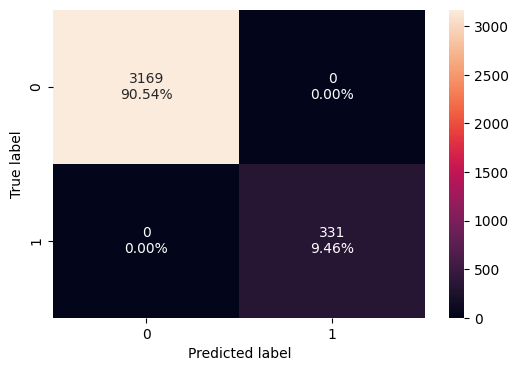

In [59]:
confusion_matrix_sklearn(model, X_train, y_train)

In [60]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Visualizing the Decision Tree**

In [61]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


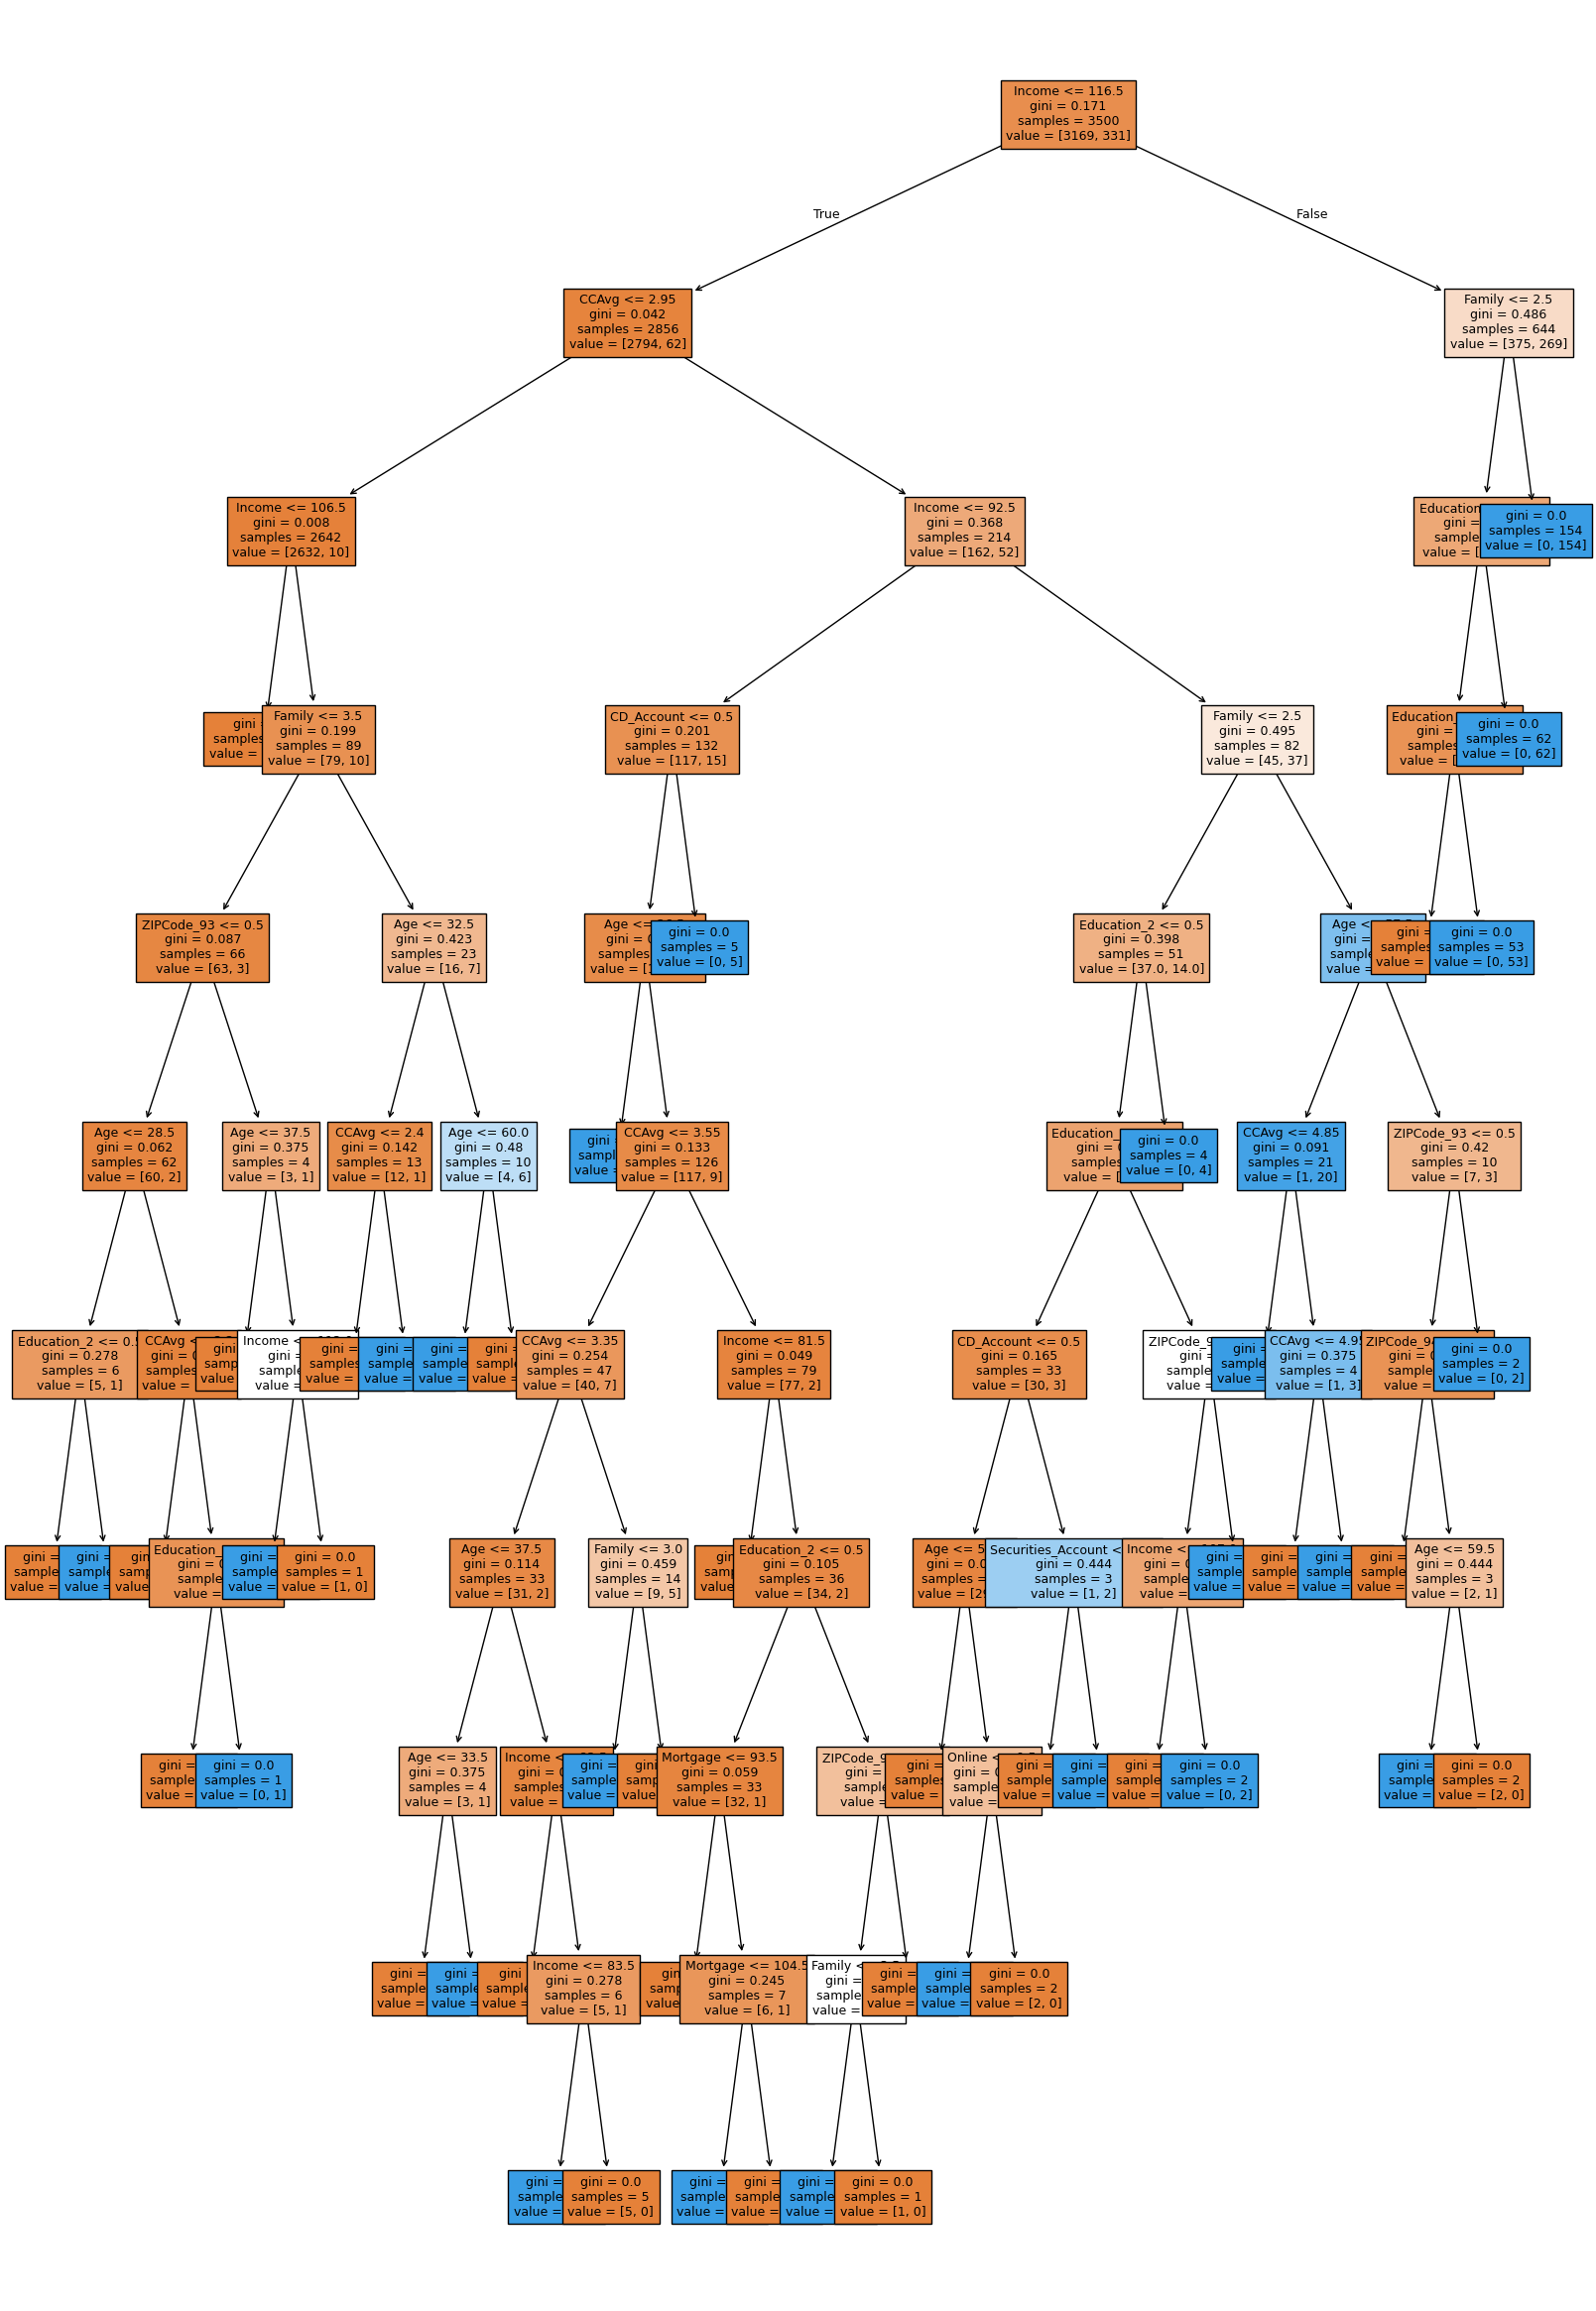

In [62]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [63]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [64]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Securities_Account  0.002224
Online              0.002224
ZIPCode_91          0.000556
CreditCard          0.000000
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


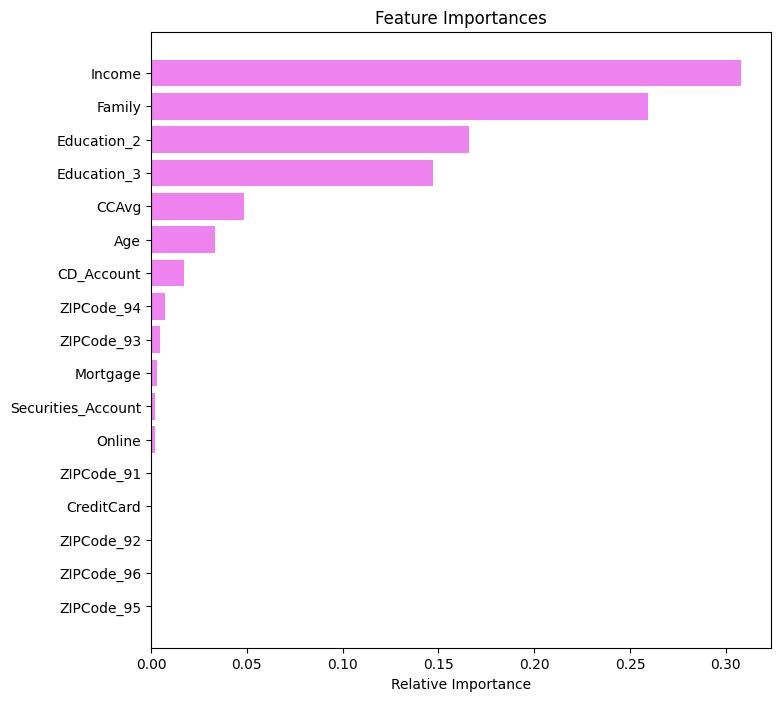

In [65]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking model performance on test data**

In [66]:
confusion_matrix(y_test, model.predict(X_test))  # Create confusion matrix for test data

array([[1340,   11],
       [  10,  139]])

In [67]:
# Check performance on test data decision_tree_perf_test
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)

## Model Performance Improvement

**Pre-pruning**

In [68]:
# Define the parameter grid
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize trackers for the best model
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Grid search over all parameter combinations
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Define and train the decision tree model
            model = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )
            model.fit(X_train, y_train)

            # Predict on both training and testing data
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Calculate recall for both sets
            train_recall = recall_score(y_train, y_train_pred)
            test_recall = recall_score(y_test, y_test_pred)

            # Evaluate performance: small train-test recall gap + high test recall
            recall_gap = abs(train_recall - test_recall)
            if recall_gap < best_score_diff and test_recall > best_test_score:
                best_score_diff = recall_gap
                best_test_score = test_recall
                best_estimator = model

# Output the best parameters and recall
if best_estimator:
    print("Best parameters found:")
    print(f"Max depth: {best_estimator.max_depth}")
    print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
    print(f"Min samples split: {best_estimator.min_samples_split}")
    print(f"Best test recall score: {best_test_score:.4f}")
else:
    print("No suitable model found.")


Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0000


In [69]:
# Fit the best algorithm to the training data
estimator = best_estimator
estimator.fit(X_train, y_train)  # Fit model on train data

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

**Checking performance on training data**

In [70]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix for train data
confusion_matrix_sklearn = confusion_matrix  # alias if needed
confusion_matrix_sklearn(y_train, estimator.predict(X_train))

array([[2435,  734],
       [   0,  331]])

In [71]:
# Check performance on train data
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


**Visualizing the Decision Tree**

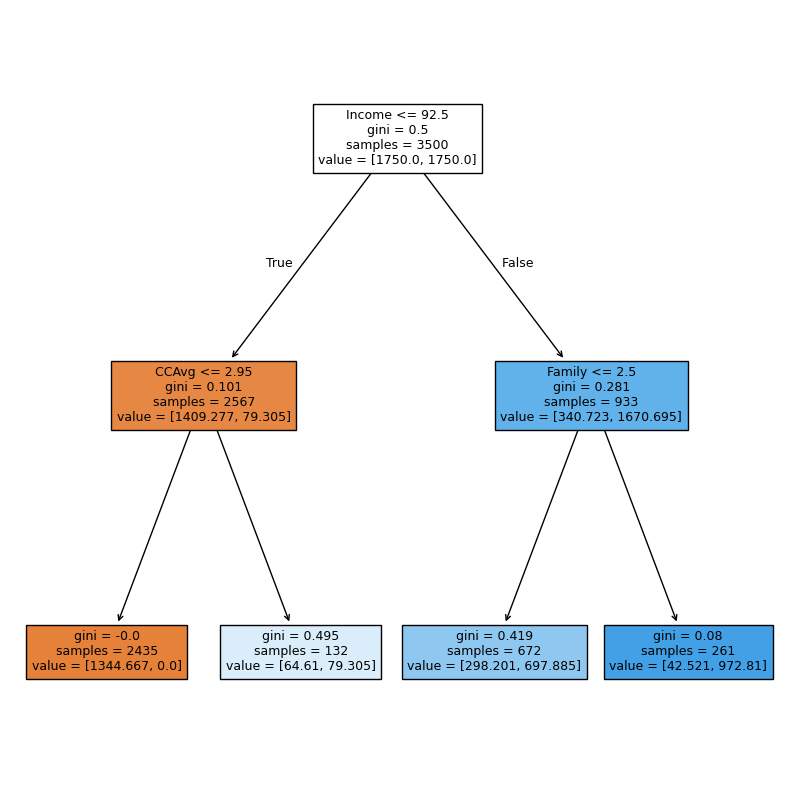

In [72]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [73]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



In [74]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.876529
CCAvg               0.066940
Family              0.056531
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Education_2         0.000000
Education_3         0.000000


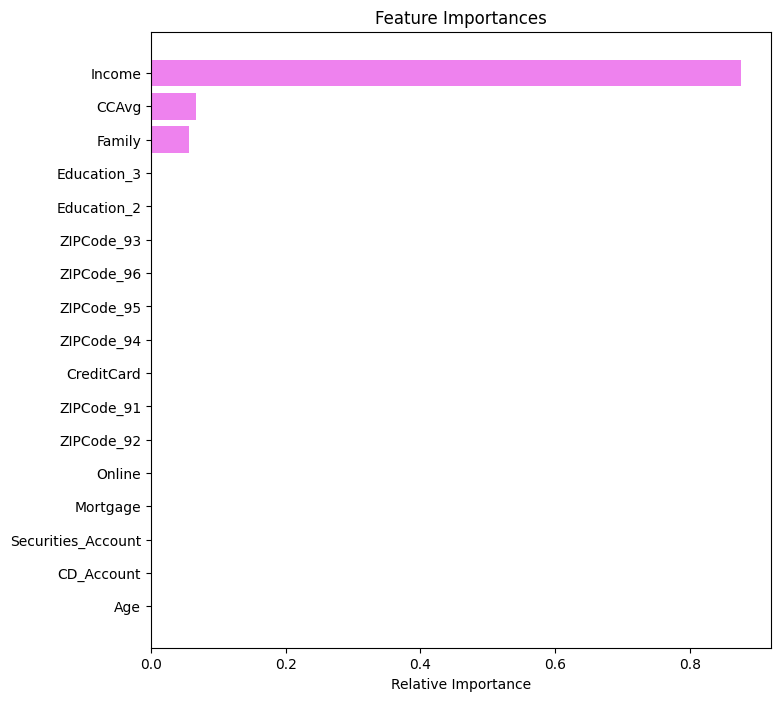

In [75]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

In [76]:
confusion_matrix_sklearn(y_test, estimator.predict(X_test))  # Get the confusion matrix on test data

array([[1020,  331],
       [   0,  149]])

In [77]:
# Check performance on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


**Post-pruning**

In [78]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [79]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


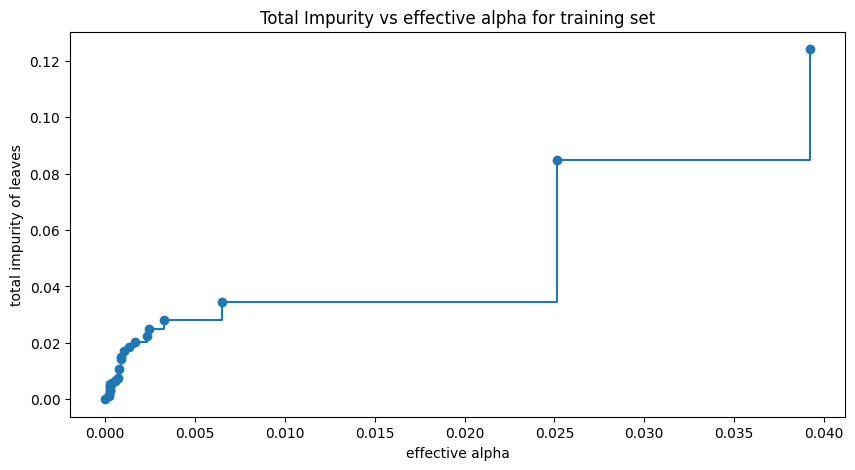

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [81]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)  # Fit decision tree on training data
    clfs.append(clf)

print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


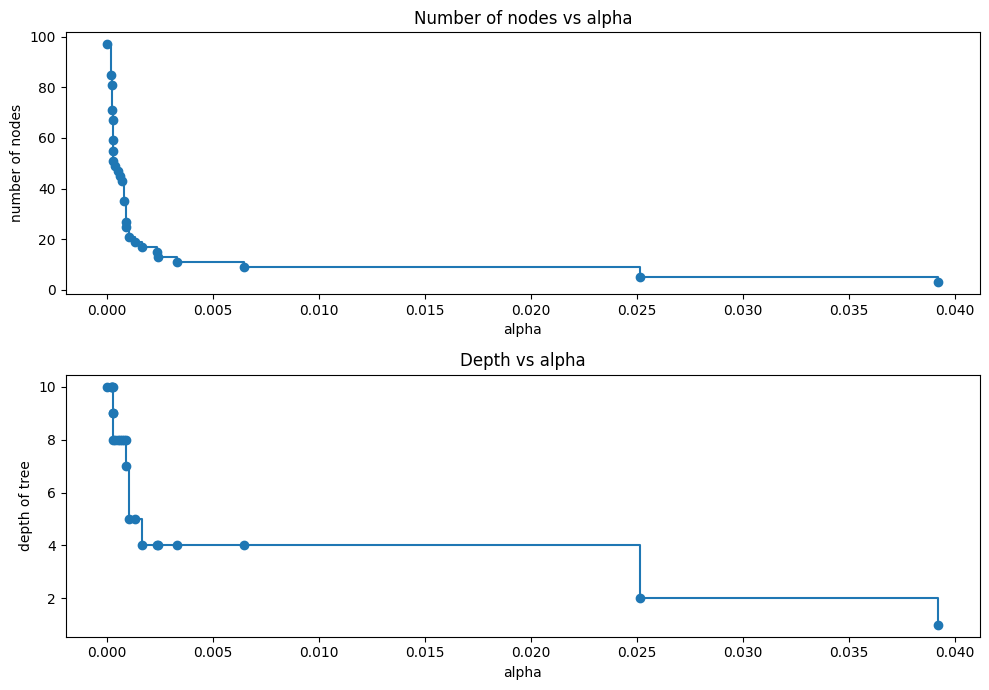

In [82]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [83]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

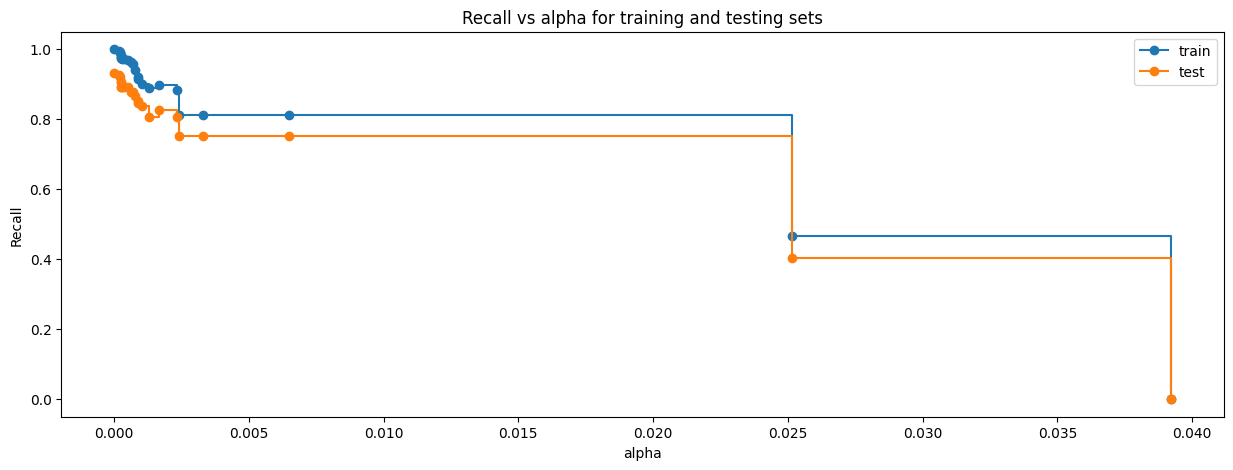

In [84]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [85]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=1)


In [86]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.01,  # Replace with your chosen alpha from pruning analysis
    class_weight={0: 0.15, 1: 0.85},
    random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

**Checking performance on training data**

In [87]:
# Create confusion matrix for train data
confusion_matrix_sklearn(y_train, estimator_2.predict(X_train))

array([[2945,  224],
       [   3,  328]])

In [88]:
# Check performance of the pruned decision tree (estimator_2) on the training data
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.935143,0.990937,0.594203,0.742922


**Visualizing the Decision Tree**

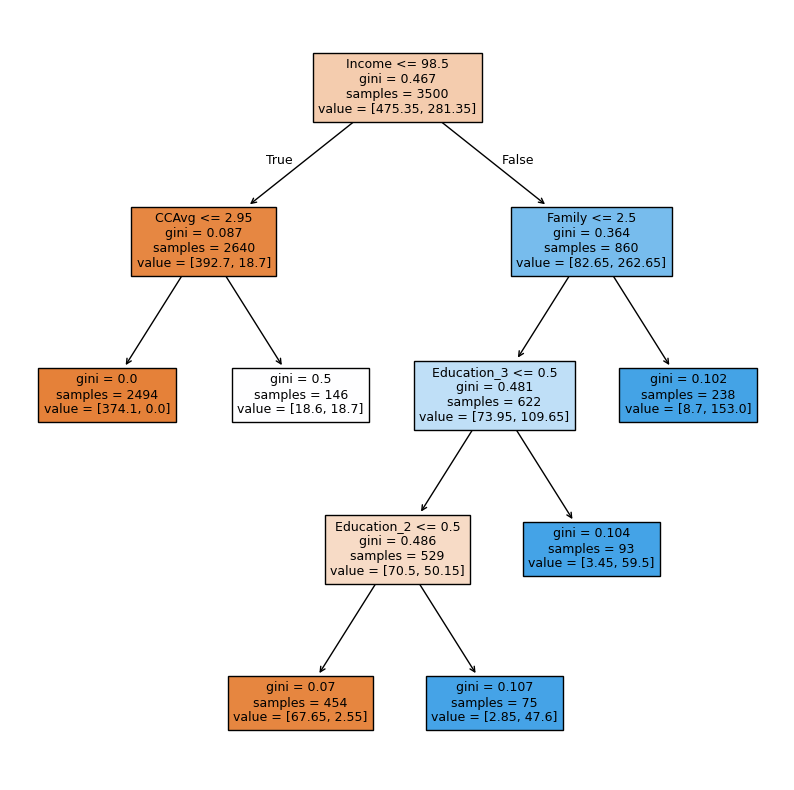

In [89]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [90]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.85, 47.60] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [3.45, 59.50] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [8.70, 153.00] class: 1



In [91]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.636860
Education_2         0.160224
Education_3         0.076930
Family              0.069445
CCAvg               0.056541
Age                 0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
CreditCard          0.000000
Online              0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


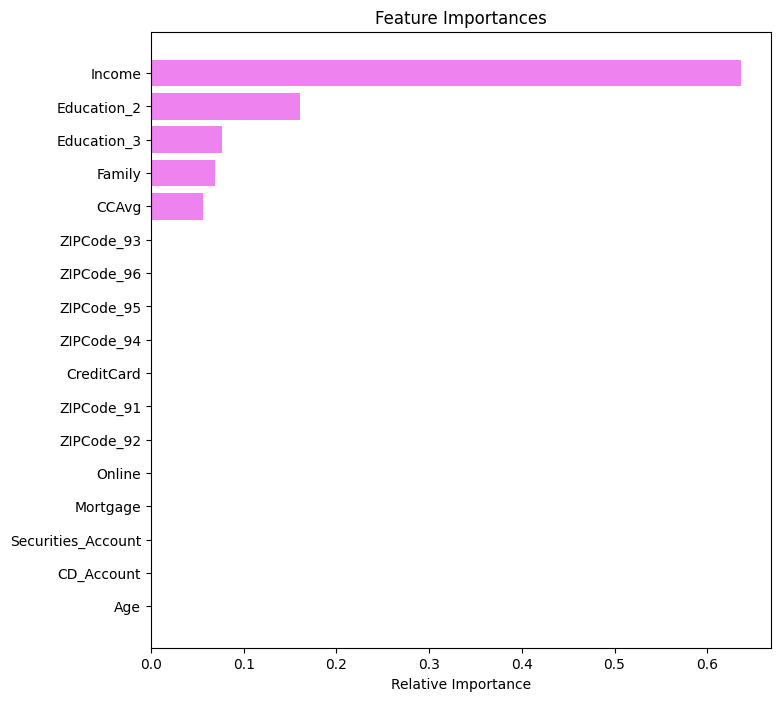

In [92]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

In [93]:
# Generate the confusion matrix on test data using the pruned decision tree (estimator_2)
confusion_matrix_sklearn(y_test, estimator_2.predict(X_test))  # Get the confusion matrix on test data

array([[1262,   89],
       [   2,  147]])

In [94]:
# Evaluate the performance of the pruned decision tree (estimator_2) on the test data
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.939333,0.986577,0.622881,0.763636


## Model Performance Comparison and Final Model Selection

In [95]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.790286,0.935143
Recall,1.0,1.000000,0.990937
Precision,1.0,0.310798,0.594203
F1,1.0,0.474212,0.742922


In [96]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.779333,0.939333
Recall,0.932886,1.000000,0.986577
Precision,0.926667,0.310417,0.622881
F1,0.929766,0.473768,0.763636


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

**Actionable insights**
*   Income, education, and credit card usage are key indicators for predicting whether a customer will opt for a personal loan.
*   Customers with high average credit card spending (CCAvg) and higher incomes are significantly more likely to accept personal loan offers.
*   Existing mortgage holders show lower interest in personal loans, indicating different financial priorities or risk profiles.
*   Online users are more receptive to personal loan offers—possibly due to higher digital engagement and convenience-driven behavior.

**Business Recommendations**

**1.Target Marketing Campaigns:**
*   Focus personal loan campaigns on customers with higher income and higher credit card usage (e.g., CCAvg > 2.5, Income > 90k).
*   Use online banking activity as a segmentation criterion for digital loan marketing.

**2.Cross-Selling Strategy:**
*   Promote personal loans alongside credit card and online banking services to users already engaged with these products.

**3.Product Customization:**
* **Offer tailored personal loan products** for mortgage holders with lower interest rates, longer repayment periods, or flexible EMI options to align with their existing debt obligations and reduce financial strain.

* **Bundle personal and mortgage loans** into integrated repayment plans, using data such as outstanding mortgage balance and tenure to set personalized loan limits and risk-based pricing.

**4.Channel Optimization:**
*   Increase investments in digital engagement (e.g., app push notifications, email campaigns), especially for tech-savvy segments who are more likely to take loans.

**5.Customer Retention:**
*   Identify customers with CCAvg > $3,000 and no personal loan and flag them as high-potential targets for cross-selling campaigns, as their spending behavior indicates financial capacity and engagement.
*   Implement personalized outreach (e.g., email or app offers) for this segment, highlighting debt consolidation or cashback incentives for first-time personal loan applicants to increase conversion.

In [197]:
# Convert Jupyter notebook to HTML format
!jupyter nbconvert --to html '/content/drive/MyDrive/Python/ML/project/AIML_ML_Project_full_code_notebook.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Python/ML/project/AIML_ML_Project_full_code_notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 36 image(s).
[NbConvertApp] Writing 2584878 bytes to /content/drive/MyDrive/Python/ML/project/AIML_ML_Project_full_code_notebook.html


___